In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#generate random walk process
np.random.seed(200)
F = [100]
for i in range(300):
    F.append(F[i]+ np.random.randn())
F = np.array(F)

#Generate Price 
price_a = F + np.random.randn(len(F))
price_b = F + np.random.randn(len(F))


View price of stock a and b in the dataframe.

In [4]:

df = pd.DataFrame(price_a, price_b)
df.head(5)

Now Lets Plot the price that we Generated for stock a.  
#usually we use historical price data from Yahoo Finance API (yfinance) from the specified peroid and use it as a benchmark index to compare performance of the pair trading strategy

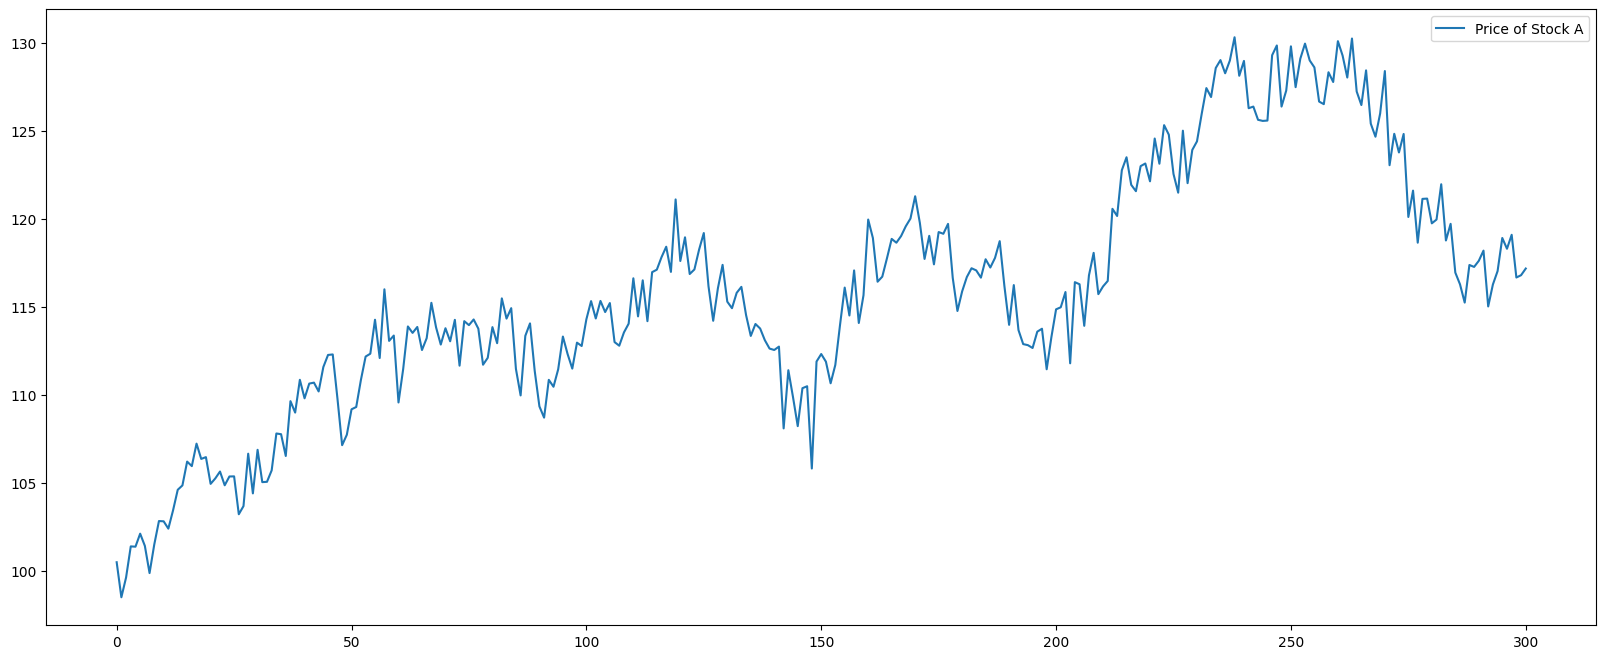

In [12]:
plt.figure(figsize=(20,8))
plt.plot(price_a,label = "Price of Stock A")
plt.legend()

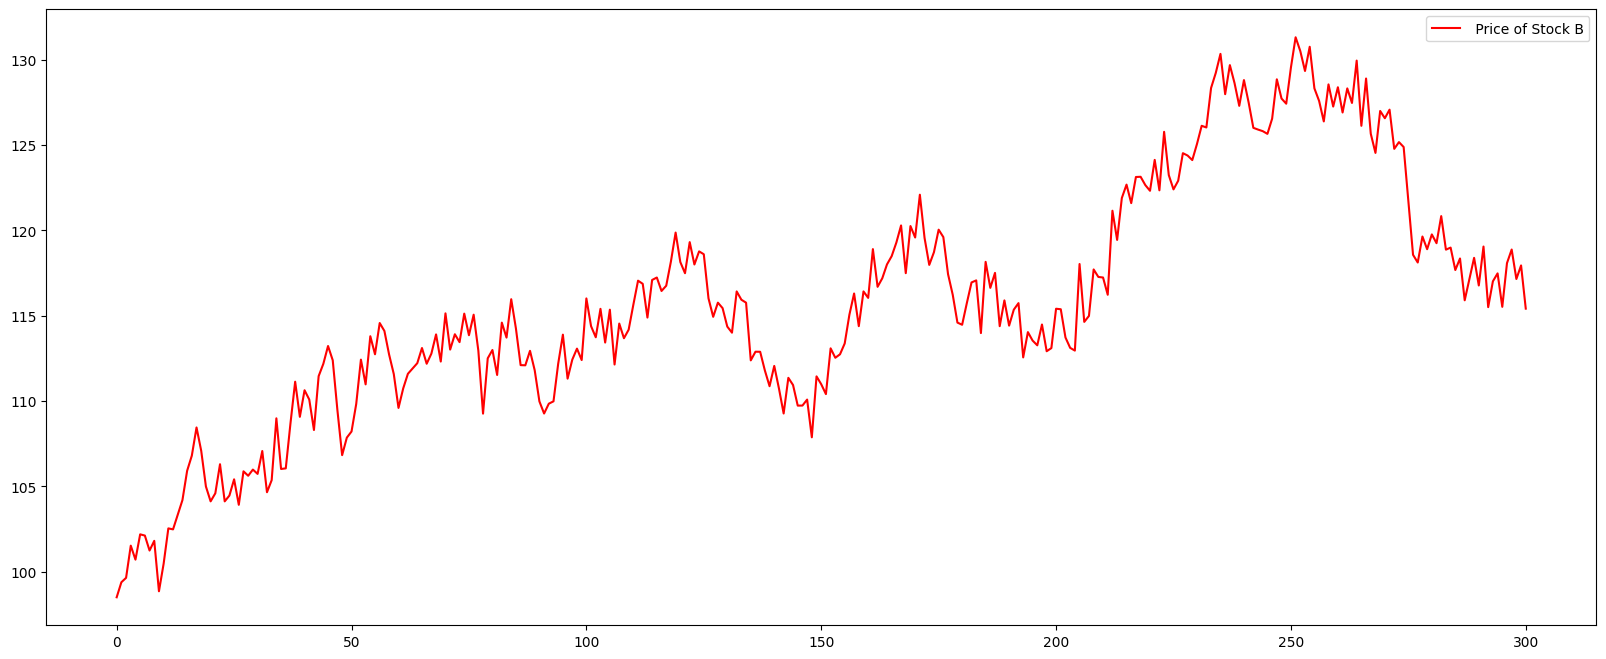

In [21]:
plt.figure(figsize=(20,8))
plt.plot(price_b, label = " Price of Stock B",  color = "r")
plt.legend()

If we look at the price series of the stock a and b Seperately, They are generated randomly so they look like a random walk. However, if next to impossible to see way to predict their future movements. 
Lets plot both the stock prices together.

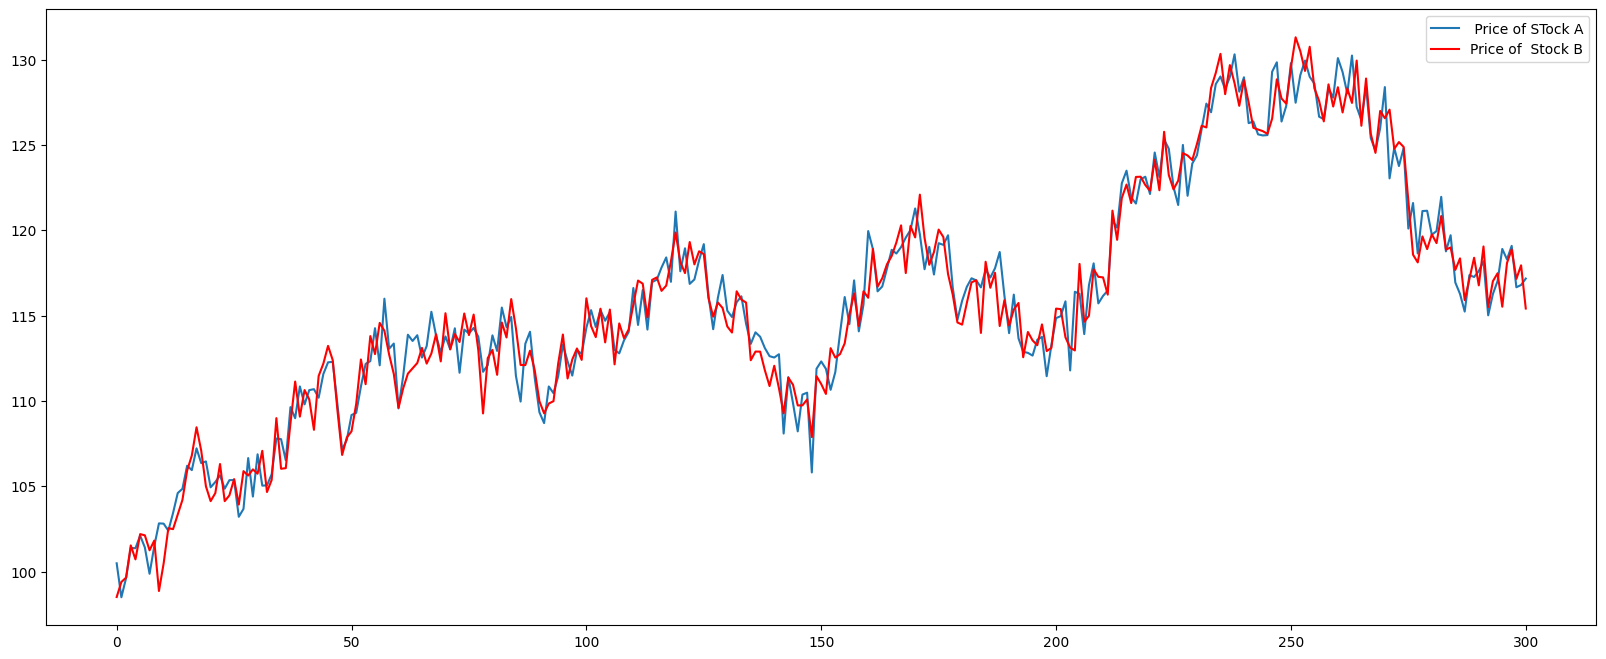

In [22]:
plt.figure(figsize=(20,8))
plt.plot(price_a, label = " Price of STock A")
plt.plot(price_b, label = "Price of  Stock B",  color = "r")
plt.legend()

As we can see in thhe above plot the prices tend to move together. Now  question is that how can we use this to predict the future movement of these stocks?
What will be the portfolio return assuming we create a portfolio by taking a long position in the Stock A and short position in stock B.

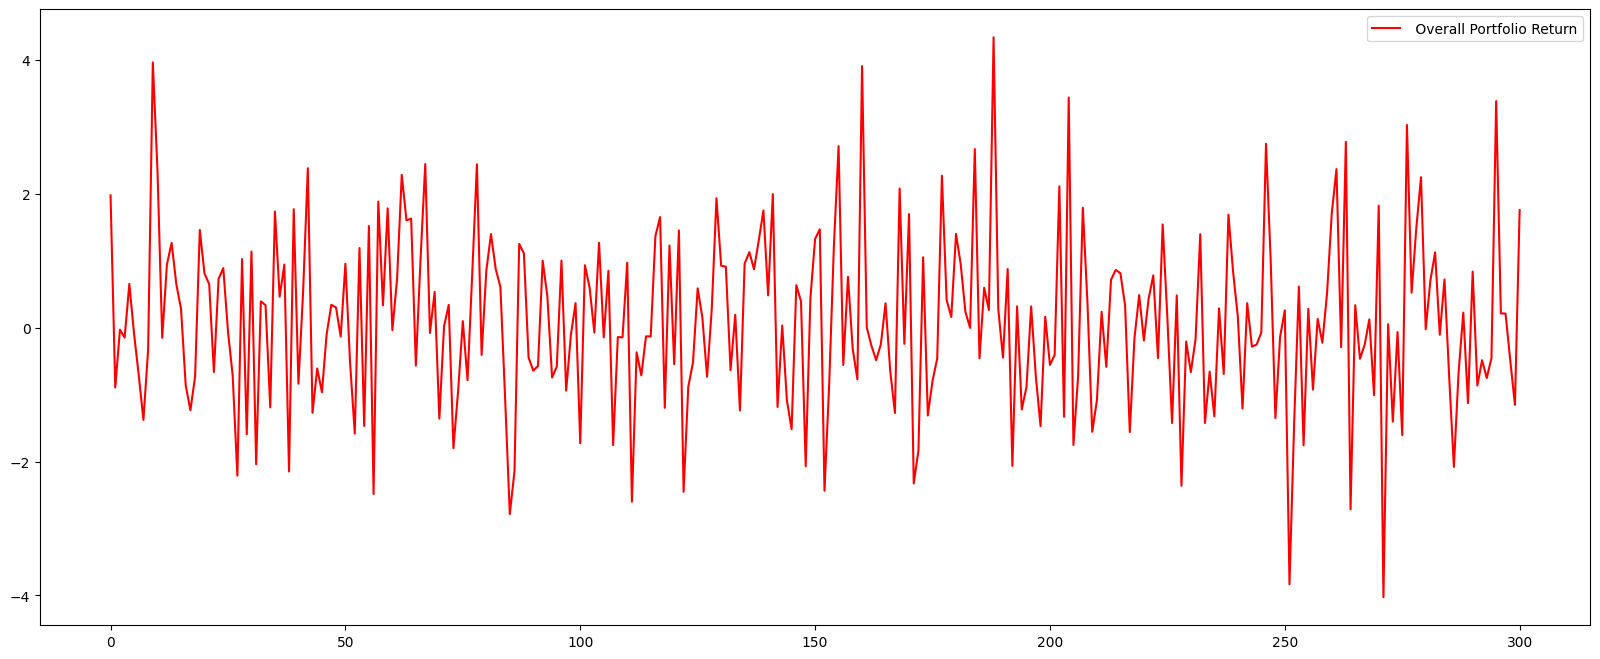

In [20]:
portfolio = price_a - price_b
plt.figure(figsize = (20,8))
plt.plot(portfolio, label = " Overall Portfolio Return", color = "r")
plt.legend()

This approach is known as mean-reversion strategy, which is a popular trading strategy used by many investors. The strategy involves identifying a security or portfolio whose price has moved away from its historical mean, and then opening a position in the opposite direction with the expectation that the price will return to its mean.

In the case of pair trading, the mean-reversion strategy involves opening a long position when the portfolio price is more than 2 standard deviations below the mean, and closing the position when the price crosses the mean from below. Similarly, a short position is opened when the portfolio price is more than 2 standard deviations above the mean, and closed when the price crosses the mean from above.

The mean-reversion strategy assumes that the price of the security or portfolio will eventually return to its mean value, and that deviations from the mean are only temporary. This strategy is based on the idea that prices tend to fluctuate around their mean value, and that extreme deviations from the mean are likely to be followed by a reversion to the mean.

Text(0.5, 1.0, 'Portfolio Positions')

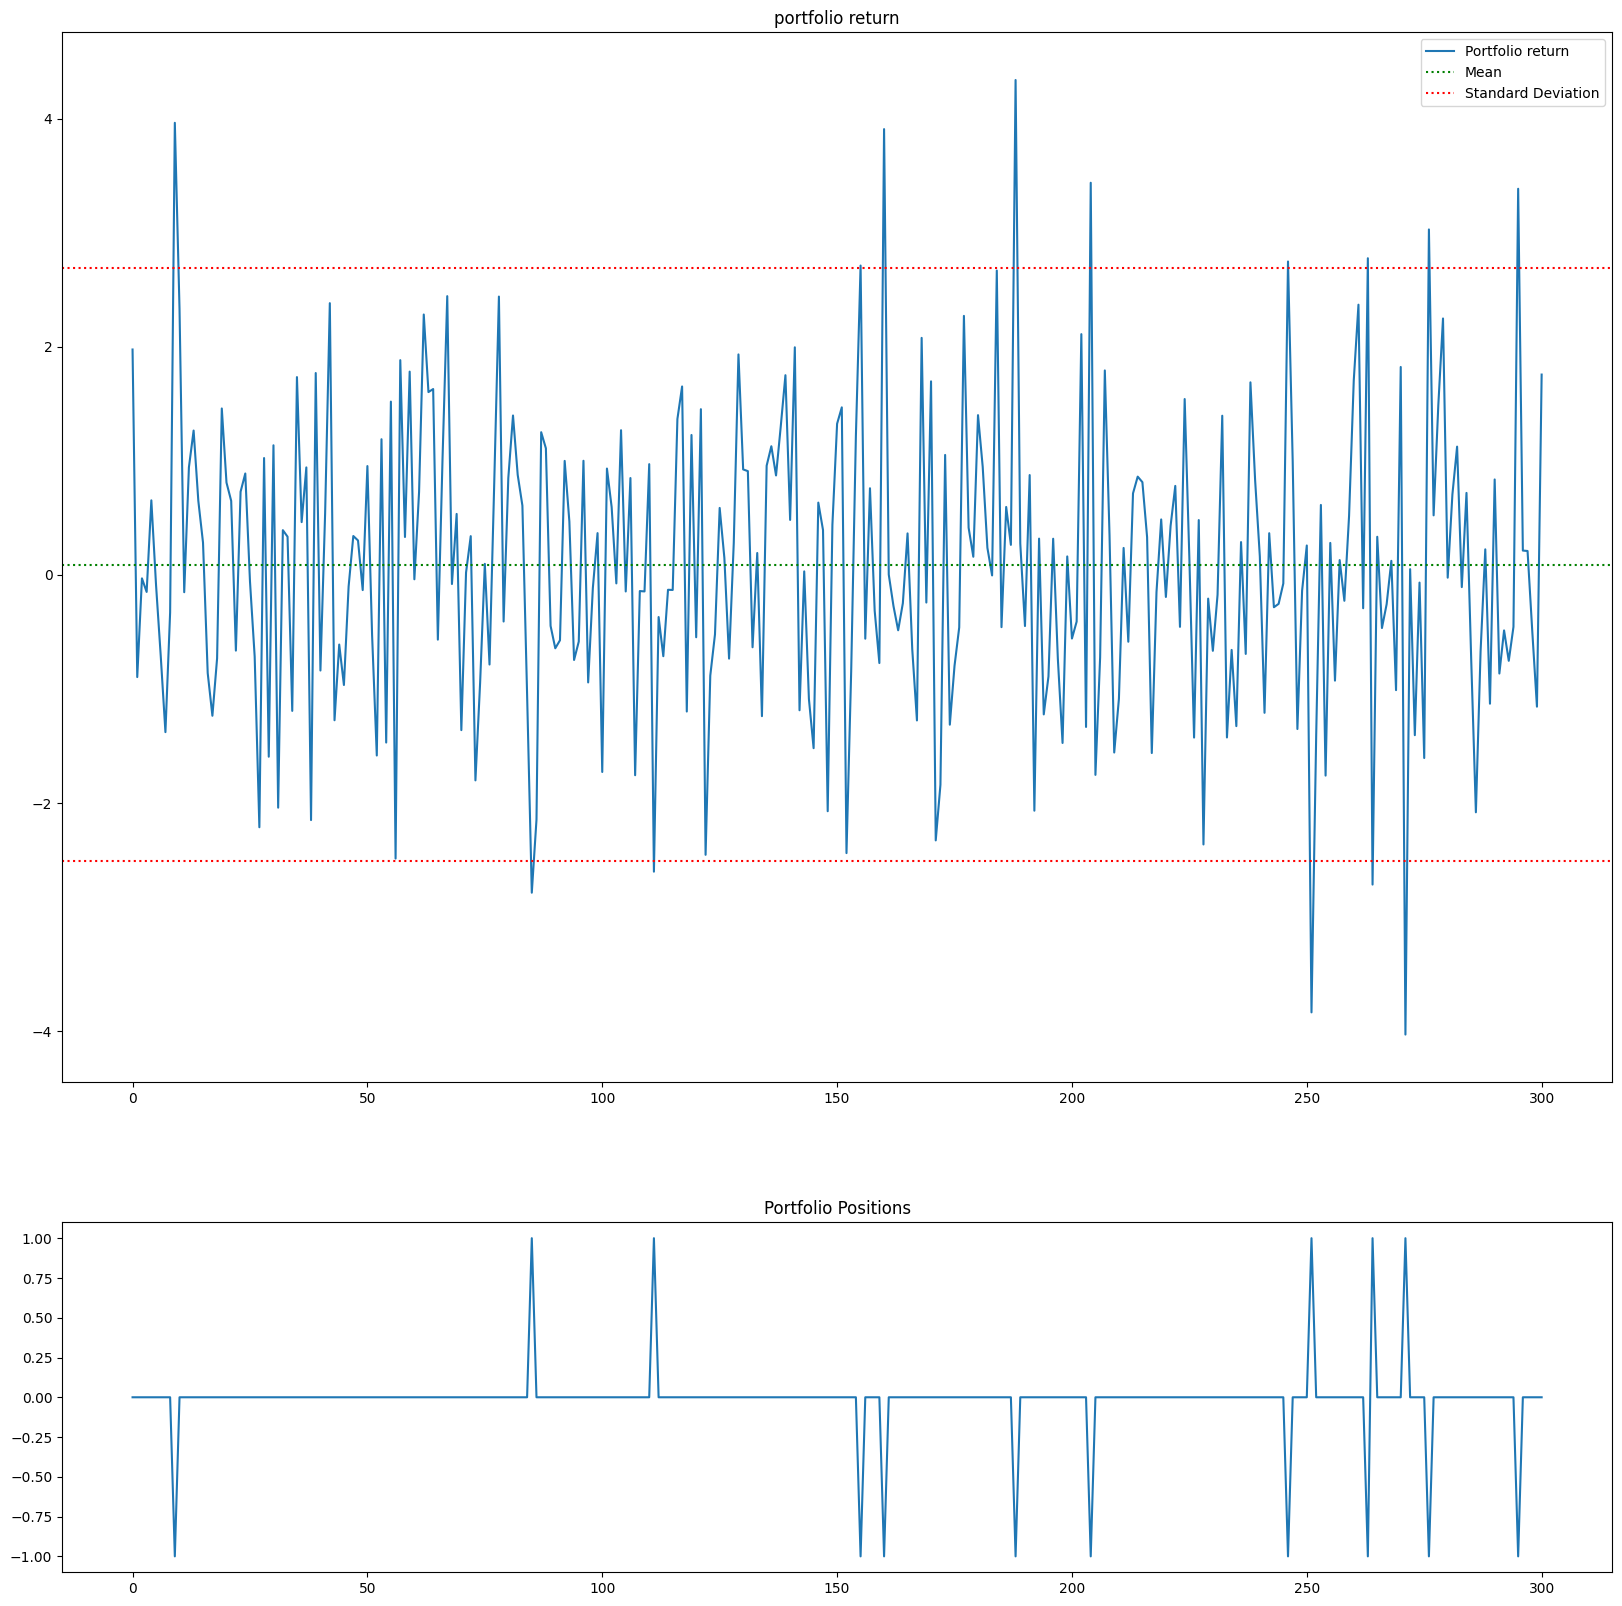

In [27]:
#Now, calculate portfolio Mean and Standard deviation
MU = np.mean(portfolio)
SD = np.std(portfolio)

#Calculattions for the Positions 
port_positions = np.zeros(portfolio.shape)
port_positions[portfolio > MU + 2 * SD] = -1 # Short position
port_positions[portfolio < MU - 2 * SD] = +1 # long position


#plot portfolio retuns and positons 
f, (a1,a2) = plt.subplots(2,1, gridspec_kw =  {'height_ratios':[3,1]})
f.set_figwidth(20)
f.set_figheight(20)
a1.plot(portfolio, label= 'Portfolio return')
a1.set_title("portfolio return")

a1.axhline(y = MU, color='g', linestyle = 'dotted', label = "Mean")
a1.axhline(y = MU + 2 * SD, color='r', linestyle = 'dotted', label = "Standard Deviation")
a1.axhline(y = MU - 2 * SD, color='r', linestyle = 'dotted')
a1.legend(loc = 'upper right')
a2.plot(port_positions)
a2.set_title("Portfolio Positions")


In [35]:
#approximate return
# 14 trading opportunities, approximately 2* SD profit per trade
port_return = 14*2*SD 
print("Portfolio return =",port_return)
per_trade = port_return/14
print("Per Trade Profit =",per_trade)

Portfolio return = 36.3492567991519
Per Trade Profit = 2.596375485653707


there are 14 trading opportunities displayed on the plot above. If we were to trade a portfolio consisting of one stock A and one stock B, then we could earn approximately $36 profit ($2.59 per trade). If we traded a portfolio consisting of 100 stocks A and 100 stocks B, then our gains and losses should be multiplied by 100, giving a profit of $3600.

This synthetic example demonstrates the general principle of pairs trading. Of course in real life it is a lot more complicated. In the following articles I will describe several methods of pair selection and apply them to real world data.